# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

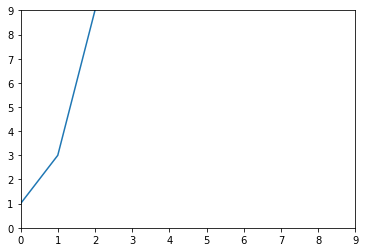

In [29]:
import matplotlib.pyplot as plt

plt.plot([0,1,2], [1,3,9])
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.show();

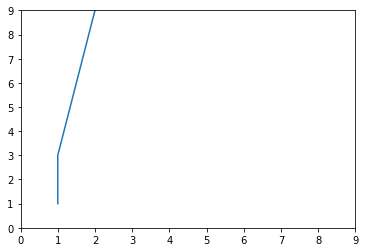

In [31]:
plt.plot([1,1,2], [1,3,9])
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.show();

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Functions have one and only one output for a given input.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Only Relation 2. The other functions have multiple outputs for the same input.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

**m**

input: R^3

output: R^3

**n**

input: R^3

output: R^2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Sure
\begin{align}
m(𝑥_1,𝑥_2)=(x_1, x_2, x_1+x_2)
\end{align}

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = x_1\begin{bmatrix} 1 \\-1 \\  \end{bmatrix} + x_2\begin{bmatrix} 3 \\2 \\  \end{bmatrix}
\\
\\
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 \\x_2 \\  \end{bmatrix} \begin{bmatrix} 1 &3 \\-1 &2 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}\begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2 \end{bmatrix}
\\
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

```
p(4, 7) =
    x_1 = 4 + 3*7 = 25
    x_2 = 2*7 - 4 = 10
```

In [42]:
import numpy as np

p_trans = np.array([[ 1, 3],
                    [-1, 2]])
p_test = np.array([[4],
                   [7]])
np.matmul(p_trans, p_test)

array([[25],
       [10]])

```
q(1, 2, 3) =
    x_1 = 4*1 + 2 + 2*3 = 12
    x_2 = 2*2 - 1 + 3*3 = 12
    x_3 = 5*1 - 2*3 + 2 = 1
```

In [43]:
q_trans = np.array([[ 4, 1,  2],
                    [-1, 2,  3],
                    [ 5, 1, -2]])
q_test = np.array([[1],
                   [2],
                   [3]])
np.matmul(q_trans, q_test)

array([[12],
       [12],
       [ 1]])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

**Eigenvectors** are the unique vectors of a space-transformation pair that are not re-oriented by the transformation of that space. However, the eigenvecotr may be scaled by this transformation, in which case this scalar is known as the **eigenvalue**.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

With more dimensions, the more "distant" vectors are from each other, the less meaningful that distance is (they become equidistant), and the greater the threat of over-fitting.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

5 * number of dimensions

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [112]:
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/'
                 'raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
target = 'species'
features = [col for col in df if col != target]
X = df[features].copy()

for feature in X:
    X[feature] = (X[feature] - X[feature].mean()) / X[feature].std(ddof=1)

covariance_matrix = np.cov(X.T)

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

P = eig_vectors.T.dot(X.T)

P

array([[-2.25698063e+00, -2.07945912e+00, -2.36004408e+00,
        -2.29650366e+00, -2.38080159e+00, -2.06362348e+00,
        -2.43754534e+00, -2.22638327e+00, -2.33413810e+00,
        -2.18136797e+00, -2.15626287e+00, -2.31960686e+00,
        -2.21665672e+00, -2.63090249e+00, -2.18497165e+00,
        -2.24394778e+00, -2.19539570e+00, -2.18286636e+00,
        -1.88775015e+00, -2.33213620e+00, -1.90816387e+00,
        -2.19728429e+00, -2.76490710e+00, -1.81433338e+00,
        -2.22077769e+00, -1.95048969e+00, -2.04521166e+00,
        -2.16095426e+00, -2.13315968e+00, -2.26121491e+00,
        -2.13739396e+00, -1.82582143e+00, -2.59949432e+00,
        -2.42981077e+00, -2.18136797e+00, -2.20373717e+00,
        -2.03759040e+00, -2.18136797e+00, -2.42781878e+00,
        -2.16329995e+00, -2.27889274e+00, -1.86545777e+00,
        -2.54929405e+00, -1.95772074e+00, -2.12624970e+00,
        -2.06842817e+00, -2.37330742e+00, -2.39018435e+00,
        -2.21934620e+00, -2.19858869e+00,  1.10030752e+0

In [110]:
# Using sklearn
from sklearn.decomposition import PCA

target = 'species'
features = [col for col in df if col != target]
X = df[features].copy()

pca = PCA(2)
pca.fit(X)
B = pca.transform(X)

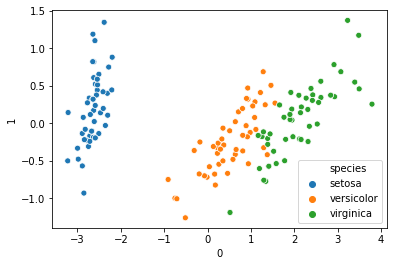

In [111]:
import seaborn as sns

sns.scatterplot(x=0, y=1, data=df[[target]].join(pd.DataFrame(B)), hue='species');

# Stretch Goal

1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)